# Red Wine Quality
Este projeto utiliza o dataset "Red Wine Quality", que contém dados sobre a variante tinta do vinho português "Vinho Verde". O objetivo é aplicar técnicas de Ciência de Dados para entender como as propriedades físico-químicas de um vinho influenciam sua percepção sensorial e qualidade final.

**Clusterização (Aprendizado Não Supervisionado)**: Agrupar os vinhos com base em suas semelhanças químicas (como acidez, teor alcoólico e pH) para identificar diferentes "perfis" ou estilos de produção, independentemente da nota atribuída por especialistas.

**Classificação (Aprendizado Supervisionado)**: Construir um modelo preditivo capaz de classificar se um vinho é de "Alta Qualidade" ou "Baixa/Média Qualidade", utilizando as variáveis químicas e os perfis identificados na clusterização como preditores.

O dataset está disponível no link: https://archive.ics.uci.edu/ml/datasets/wine+quality


# Descrição dos Atributos

Os atributos deste dataset capturam a "impressão digital" química do vinho. Eles podem ser divididos em três categorias principais: acidez, conservação e corpo.

## 1. Componentes de Acidez

A acidez é a espinha dorsal do vinho, influenciando o frescor e a longevidade.

* **Fixed acidity (Acidez Fixa):** Representa a maioria dos ácidos naturais da uva (como tartárico e málico) que não evaporam facilmente. Eles dão estrutura ao paladar.
* **Volatile acidity (Acidez Volátil):** Refere-se à quantidade de ácido acético. Em níveis altos, pode dar um gosto desagradável de vinagre, sendo um forte indicador para a classificação de baixa qualidade.
* **Citric acid (Ácido Cítrico):** Encontrado em pequenas quantidades, pode adicionar uma sensação de "frescor" e sabor cítrico aos vinhos tintos.
* **pH:** Mede o quão ácido ou básico o vinho é. A maioria dos vinhos tintos situa-se entre 3.3 e 3.6. O pH afeta a cor e a estabilidade microbiana.

## 2. Componentes de Conservação e Pureza

* **Residual sugar (Açúcar Residual):** É a quantidade de açúcar que sobra após a fermentação. Vinhos com valores muito baixos são considerados "secos", enquanto valores altos podem indicar vinhos mais suaves ou doces.
* **Chlorides (Cloretos):** Representam a quantidade de sal no vinho. Pode influenciar a percepção de mineralidade.
* **Free sulfur dioxide (Dióxido de Enxofre Livre):** A parte do  que previne o crescimento microbiano e a oxidação do vinho.
* **Total sulfur dioxide (Dióxido de Enxofre Total):** A soma das formas livres e ligadas de . Em excesso, torna-se detectável pelo olfato e prejudica a experiência sensorial.

## 3. Estrutura e Álcool

* **Density (Densidade):** Depende do teor de álcool e açúcar. Vinhos mais "encorpados" tendem a ter uma densidade diferente da água.
* **Alcohol (Álcool):** O percentual alcoólico. É um dos fatores que mais influencia a nota final de qualidade, pois traz sensação de calor e corpo ao vinho.

### 3.4 Variável Alvo (Target)

* **Quality (Qualidade):** É o resultado de avaliações sensoriais feitas por especialistas, com notas variando entre 3 e 8. Para fins de classificação, esta variável pode ser agrupada em categorias como "Baixa" e "Alta" qualidade.



In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cmap = sns.color_palette("flare", as_cmap=True)
cmap_discrete = sns.color_palette("flare")

In [ ]:
wine = pd.read_csv('..\\data\\raw\\winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


O dataset é composto por 1599 registros e 12 colunas. Todos os atributos são do tipo numérico e não há dados faltantes.

In [54]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [55]:
wine.duplicated().sum()

np.int64(240)

As notas dadas pelos especialistas variam de 3 a 8

In [60]:
wine = wine.drop_duplicates()
wine = wine.reset_index(drop=True)
wine.quality.value_counts()

,count
quality,
5,577
6,535
7,167
4,53
8,17
3,10


/tmp/ipython-input-3165515033.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine, palette=cmap_discrete)


<Axes: xlabel='quality', ylabel='count'>

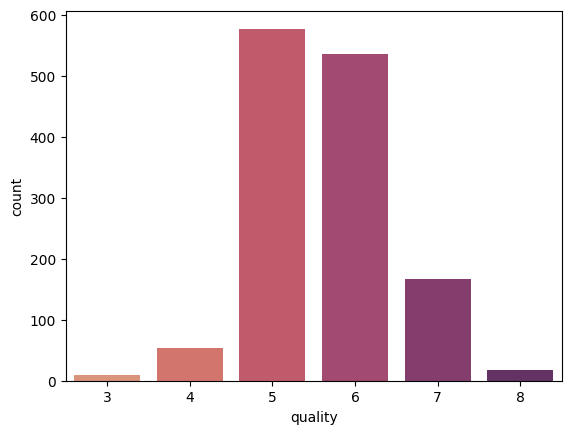

In [61]:
sns.countplot(x='quality', data=wine, palette=cmap_discrete)

A maioria das features tem valores entre 0 e 20.

Algumas, como total sulfur dioxide, chegam a valores próximos de 300.

Algoritmos baseados em distâncias (como KNN) ou gradientes podem ser influenciados por features com grande magnitude.

Por exemplo, se uma feature varia de 0 a 300 e outra de 0 a 10, a primeira dominará as distâncias, tornando a segunda quase irrelevante.

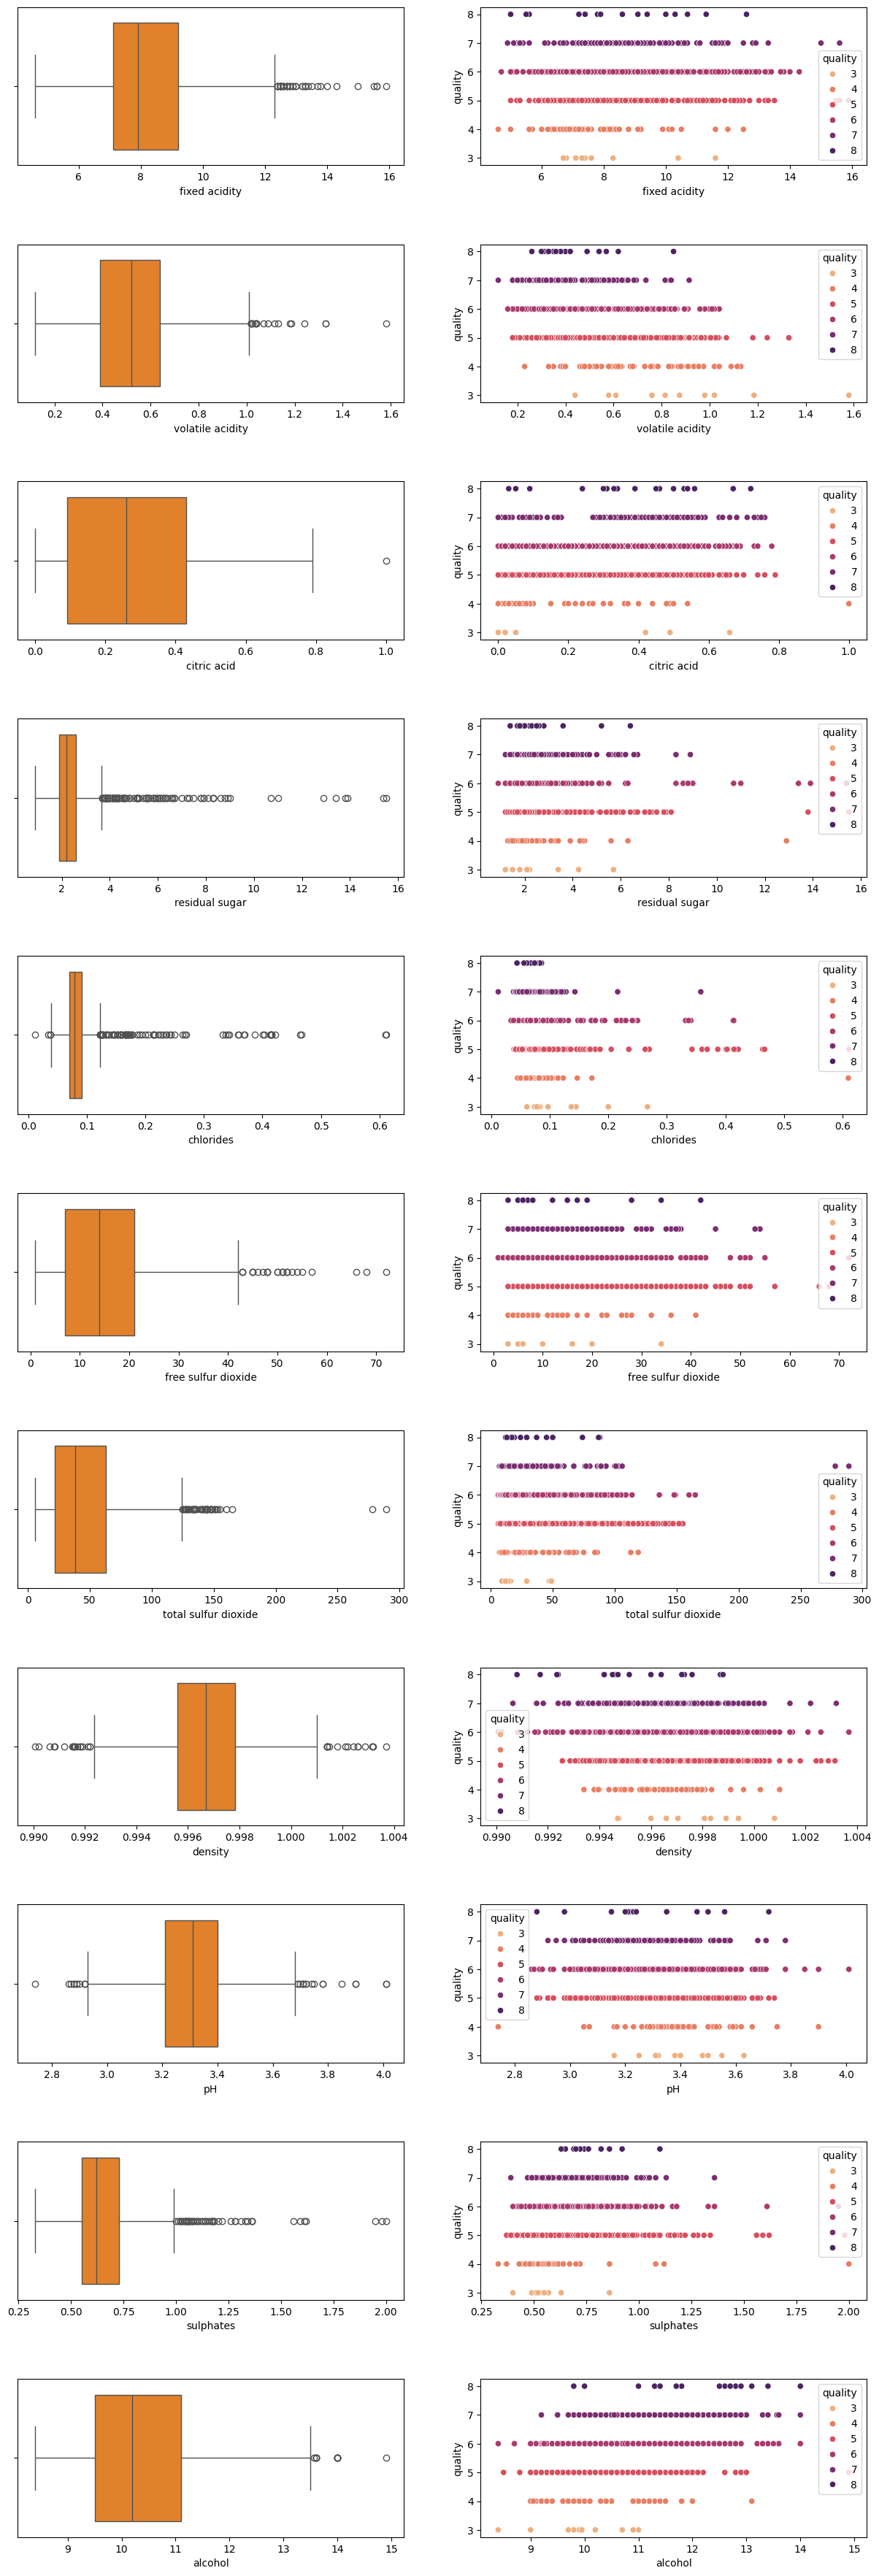

In [62]:
columns = list(wine.columns)

fig, ax = plt.subplots(11, 2, figsize=(15, 45))
plt.subplots_adjust(hspace = 0.5)
for i in range(11) :
    sns.boxplot(x=columns[i], data=wine, ax=ax[i, 0], color='#ff7f0e')
    sns.scatterplot(x=columns[i], y='quality', data=wine, hue='quality', ax=ax[i, 1], palette=cmap)

# As melhores correlações estão entre:
## - citric acid e fixed acid: 0.67
Como o ácido cítrico faz parte da soma total da acidez fixa, é natural que, quando um aumenta, o outro também suba. Eles definem o "frescor" e o caráter ácido do vinho.
## - density e fixed acid: 0.67
Ácidos (como o tartárico e o cítrico) são mais densos que a água. Portanto, quanto maior a concentração de ácidos fixos, maior tende a ser a massa por volume (densidade) do líquido. É um sinal de que o vinho tem mais "corpo".
## - total sulfur dioxide e free sulfur dioxide: 0.67
O enxofre total é a soma do enxofre que está "preso" (ligado a outras moléculas) e do enxofre "livre". Se você adiciona mais enxofre ao vinho para conservá-lo, ambos os valores tendem a subir proporcionalmente.

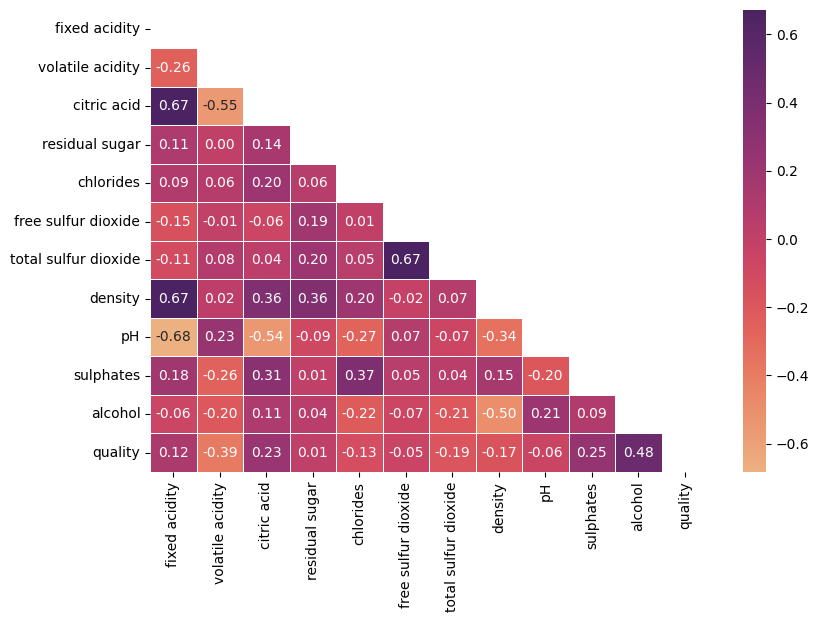

In [34]:
corr = wine.corr()
# cmap = sns.diverging_palette(-1, 1, s=100, l=50, n=15, center="dark", as_cmap=True)
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap=cmap, mask=np.triu(corr))
plt.show()

Density e pH tem distribuição normal.
Já sulphates e alcohol têm distribuição assimétrica (“skewed”).
Features com alta skewness podem prejudicar modelos que assumem normalidade ou que são sensíveis a outliers, como regressão linear, KNN ou SVM.

Modelos podem dar mais peso para regiões densas de dados ou se confundir com valores extremos.

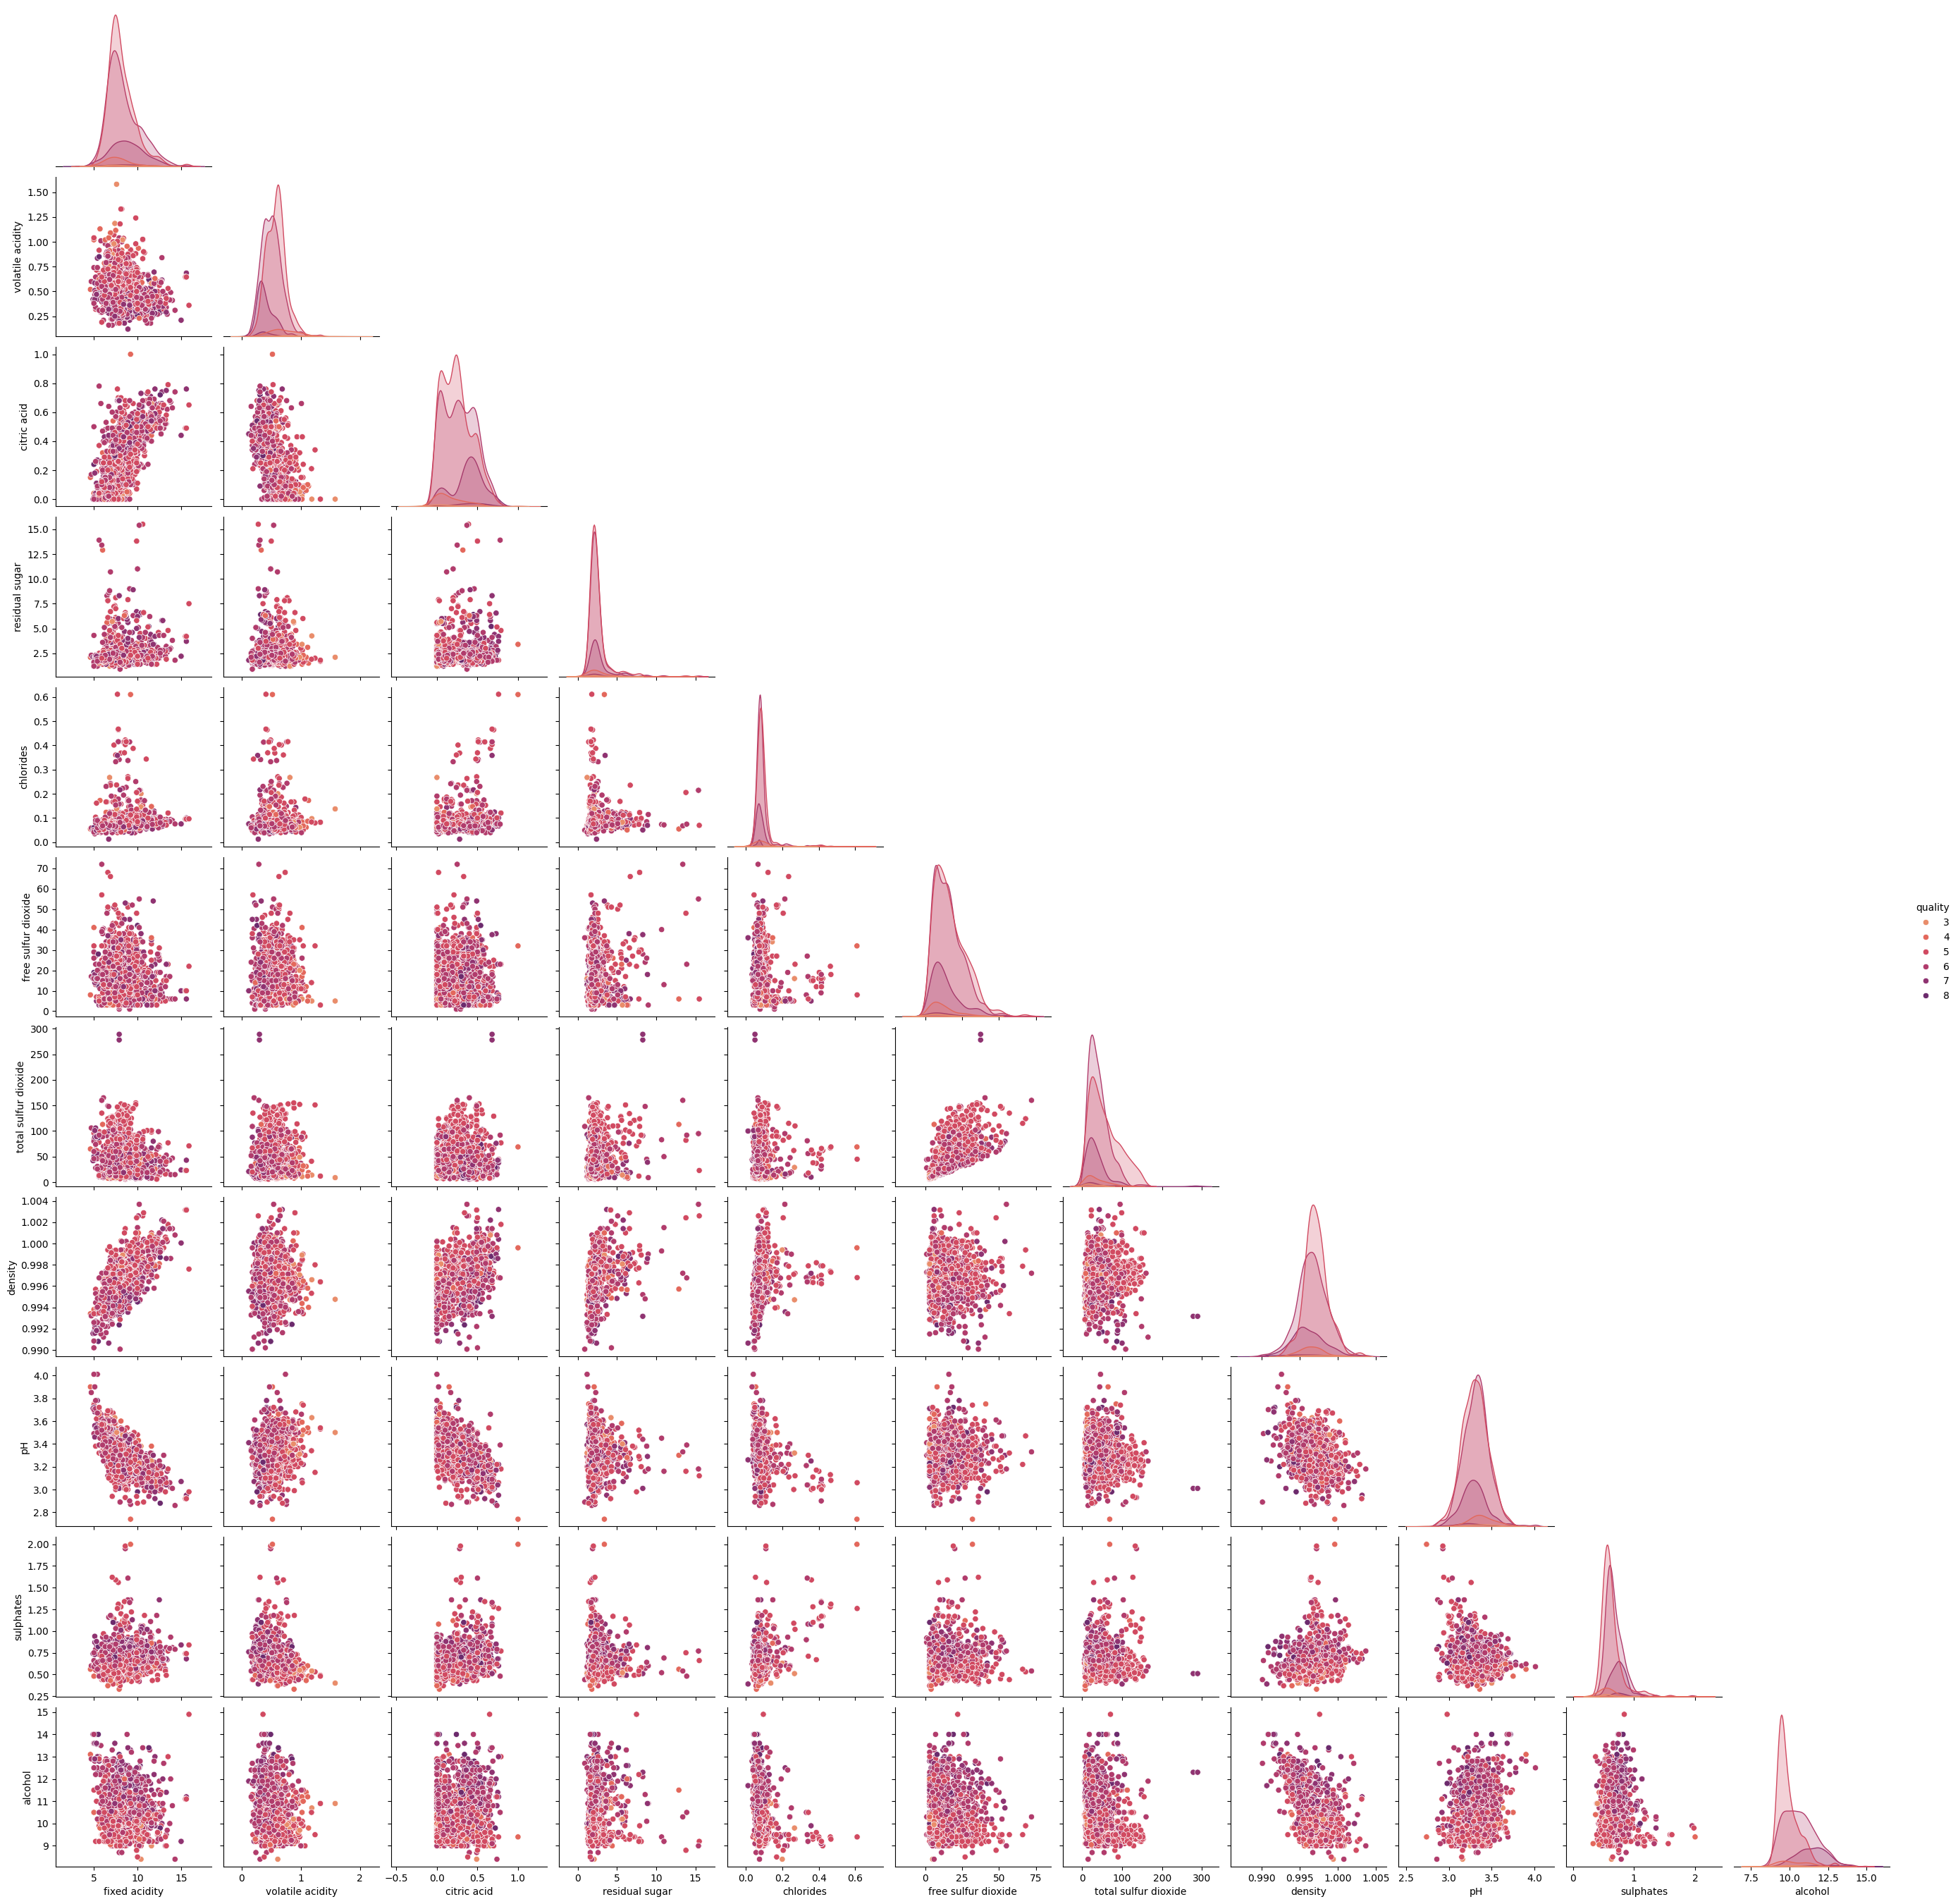

In [35]:
sns.pairplot(wine, hue='quality', corner = True, palette=cmap_discrete)

# Pré-processamento

In [70]:
wine = wine.replace({'quality' : {8 : 'Alta',7 : 'Alta',6 : 'Média',5 : 'Média',4 : 'Baixa',3 : 'Baixa'}})
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Média
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Média
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Média
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Média
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Média


Dataset desbalanceado: há mais vinhos ok do que muito bons ou muito ruins

In [71]:
# Rótulo
y = wine["quality"].map({'Baixa': 0, 'Média': 1, 'Alta': 2})

# Atributos
x = wine.drop("quality", axis = 1)

In [93]:
wine.quality.value_counts()

,count
quality,
Média,1112
Alta,184
Baixa,63


# Modelos de Classificação

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# As outras ferramentas que usamos na função
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

Parâmetros do modelo utilizados no GridSearch

In [81]:
model_params = {
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7],
            'model__weights': ['uniform', 'distance'],
            'model__metric': ['euclidean', 'manhattan']
        }
    },

    'mlp': {
        'model': MLPClassifier(max_iter=1000, random_state=42),
        'params': {
            'model__hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'model__activation': ['relu', 'tanh'],
            'model__alpha': [0.0001, 0.001]
        }
    },

    'svm': {
        'model': SVC(random_state=42),
        'params': {
            'model__C': [0.1, 1, 10, 100],
            'model__kernel': ['linear', 'rbf'],
            'model__gamma': ['scale', 'auto']
        }
    },

    'gbm': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'model__learning_rate': [0.01, 0.1],
            'model__n_estimators': [100, 200],
            'model__max_depth': [3, 5]
        }
    },

    'rf': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [None, 10, 20],
            'model__min_samples_split': [2, 5],
            'model__criterion': ['gini', 'entropy']
        }
    }
}

# Métricas de Avaliação

Para avaliar o desempenho dos modelos de classificação, foram utilizadas as seguintes métricas:

* Acurácia (ACC): representa a proporção de previsões corretas em relação ao total de amostras.

* Precisão (Precision): mede a proporção de predições positivas que são corretas.

* Revocação (Recall): avalia a capacidade do modelo em identificar corretamente as amostras positivas.

* F1-score (F1): corresponde à média harmônica entre precisão e recall, fornecendo uma medida equilibrada entre ambas.
	​

**Justificativa do Uso do F1-score como Métrica Principal**

Embora a acurácia seja uma métrica amplamente utilizada, ela pode ser enganosa em cenários com classes desbalanceadas, como no conjunto de dados analisado, no qual uma classe majoritária concentra mais de 80% das amostras. Nesses casos, um modelo pode apresentar alta acurácia simplesmente ao favorecer a classe dominante, sem necessariamente aprender padrões relevantes das classes minoritárias.

Dessa forma, o F1-score foi adotado como a métrica principal, pois combina precisão e recall, penalizando modelos que apresentem desempenho desequilibrado entre identificar corretamente as classes e evitar falsas predições. Essa métrica é especialmente adequada para problemas de classificação multiclasse e desbalanceada, fornecendo uma avaliação mais robusta e representativa da capacidade de generalização dos modelos.

In [82]:
# Definição dos arrays que armazenarão as métricas
metrics = {
    'KNN': {'acc': [], 'prec': [], 'rec': [], 'f1': []},
    'SVM': {'acc': [], 'prec': [], 'rec': [], 'f1': []},
    'RF':  {'acc': [], 'prec': [], 'rec': [], 'f1': []},
    'GBM': {'acc': [], 'prec': [], 'rec': [], 'f1': []},
    'MLP': {'acc': [], 'prec': [], 'rec': [], 'f1': []}
}

A divisão do conjunto de dados foi realizada utilizando amostragem estratificada, garantindo que a proporção das classes fosse preservada tanto no conjunto de treino quanto no conjunto de teste. Os dados de teste (y_train e y_test) serão utilizados para avaliar  modelo final.

In [103]:
# Define o StratifiedKFold com 5 splits. Permite o balanceamento da divisão
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Divide o conjunto de dados em treino e teste, onde o teste será usado para testar o modelo final
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2, stratify=y)

def proportions(y, nome):
    count = y.value_counts().sort_index()
    percentage = y.value_counts(normalize=True).sort_index() * 100
    df = pd.DataFrame({'Qtd': count, '%': percentage.round(2)})
    print(f"\nDistribuição em: {nome}")
    print(df)

proportions(y, "Dataset Original (Total)")
proportions(y_train, "Conjunto de Treino (X_train)")
proportions(y_test, "Conjunto de Teste (X_test)")


Distribuição em: Dataset Original (Total)
          Qtd      %
quality             
0          63   4.64
1        1112  81.82
2         184  13.54

Distribuição em: Conjunto de Treino (X_train)
         Qtd      %
quality            
0         50   4.60
1        890  81.88
2        147  13.52

Distribuição em: Conjunto de Teste (X_test)
         Qtd      %
quality            
0         13   4.78
1        222  81.62
2         37  13.60


In [104]:
# Armazena os melhores modelos e seu respectivo f1_score
best_models_f1 = {nome.upper(): (None, 0) for nome in model_params.keys()}

# Para cada divisão do fold
for fold_index, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
  # Divisão dos dados
  X_train_fold = X_train.iloc[train_index]
  X_test_fold  = X_train.iloc[test_index]
  y_train_fold = y_train.iloc[train_index]
  y_test_fold  = y_train.iloc[test_index]

  # Para cada modelo realizamos um GridSearch e salvamos os seus melhores parâmetros
  for model_name, model_info in model_params.items():
    name_key = model_name.upper()

    # Pipeline (Scaler + Modelo)
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', model_info['model'])
    ])

    # GridSearch (CV interno)
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=model_info['params'],
        cv=3,
        scoring='f1_weighted',
        n_jobs=-1
    )

    # Busca de hiperparâmetros (APENAS treino do fold)
    grid_search.fit(X_train_fold, y_train_fold)

    # Melhor modelo do fold
    best_model = grid_search.best_estimator_

    # Avaliação no teste do fold
    y_pred = best_model.predict(X_test_fold)

    acc  = accuracy_score(y_test_fold, y_pred)
    prec = precision_score(y_test_fold, y_pred, average='weighted')
    rec  = recall_score(y_test_fold, y_pred, average='weighted')
    f1   = f1_score(y_test_fold, y_pred, average='weighted')

    metrics[name_key]['acc'].append(acc)
    metrics[name_key]['prec'].append(prec)
    metrics[name_key]['rec'].append(rec)
    metrics[name_key]['f1'].append(f1)

    # Guardar melhor modelo global (baseado em F1 do fold)
    if f1 > best_models_f1[name_key][1]:
        best_models_f1[name_key] = (best_model, f1)

  print(f"Fold {fold_index + 1} finalizado.")


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 1 finalizado.


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 2 finalizado.


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 3 finalizado.
Fold 4 finalizado.


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and be

Fold 5 finalizado.


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [105]:
best_models_f1

{'KNN': (Pipeline(steps=[('scaler', MinMaxScaler()),
                  ('model',
                   KNeighborsClassifier(metric='euclidean', n_neighbors=3,
                                        weights='distance'))]),
  0.7978764959951786),
 'MLP': (Pipeline(steps=[('scaler', MinMaxScaler()),
                  ('model',
                   MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000,
                                 random_state=42))]),
  0.8174935309338978),
 'SVM': (Pipeline(steps=[('scaler', MinMaxScaler()),
                  ('model', SVC(C=10, random_state=42))]),
  0.8324245096699666),
 'GBM': (Pipeline(steps=[('scaler', MinMaxScaler()),
                  ('model',
                   GradientBoostingClassifier(max_depth=5, n_estimators=200,
                                              random_state=42))]),
  0.8179858775149477),
 'RF': (Pipeline(steps=[('scaler', MinMaxScaler()),
                  ('model',
                   RandomForestClassifier(criterion='entropy',

In [106]:
df_results = pd.DataFrame(columns=['Modelo', 'Acurácia', 'F1-Score', 'Precisão', 'Recall'])

In [107]:
def confusion_matrix(model_name, y_test, y_pred):
  fig, ax = plt.subplots(figsize=(8, 6))

  disp = ConfusionMatrixDisplay.from_predictions(
      y_test,
      y_pred,
      display_labels=['Baixa', 'Média', 'Alta'],
      cmap=cmap,
      ax=ax
  )

  plt.title(f"Matriz de Confusão - {model_name}")
  plt.show()

def evaluate_model(model, model_name, X_train, X_test, y_train, y_test, results_df):
  print(f" ================================ {model_name} ================================")

  pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', model)
  ])

  # 1. Normalização dos dados de treino

  # 2. Treinamento do modelo
  pipeline.fit(X_train, y_train)

  # 3. Predição
  y_pred = pipeline.predict(X_test)

  # 4. Adiciona os resultados ao dataframe de resultados
  results_df.loc[len(results_df)] = [
    model_name, # Modelo
    accuracy_score(y_test, y_pred), # Acurácia
    f1_score(y_test, y_pred, average='weighted'), # F1-Score
    precision_score(y_test, y_pred, average='weighted'), # Precision
    recall_score(y_test, y_pred, average='weighted') # Recall
  ]

  # 5. Matriz de confusão
  confusion_matrix(model_name, y_test, y_pred)

  return results_df

Avaliação final dos modelos

In [108]:
best_knn = best_models_f1['KNN'][0]
best_mlp = best_models_f1['MLP'][0]
best_svm = best_models_f1['SVM'][0]
best_gbm = best_models_f1['GBM'][0]
best_rf = best_models_f1['RF'][0]

 ================================ KNN ================================


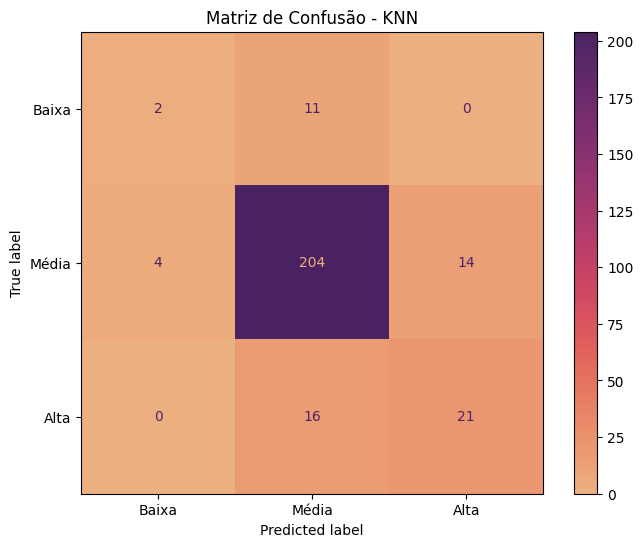

 ================================ SVM ================================


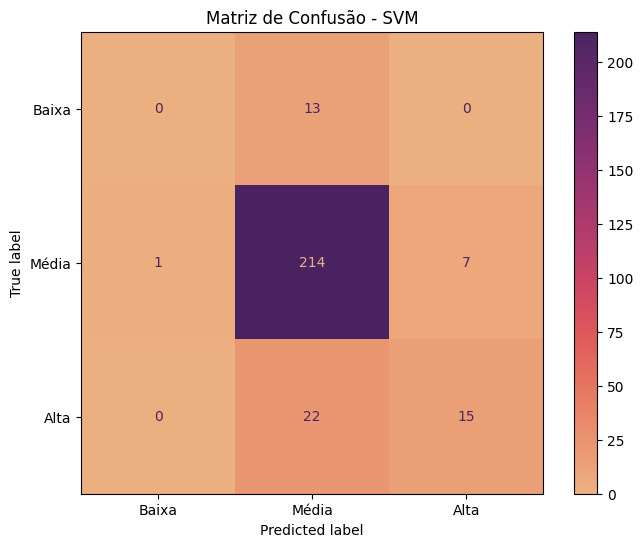

 ================================ RF ================================


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


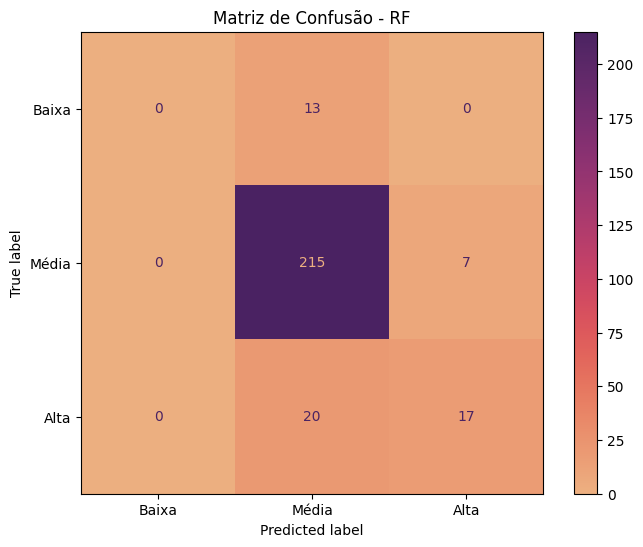

 ================================ GBM ================================


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


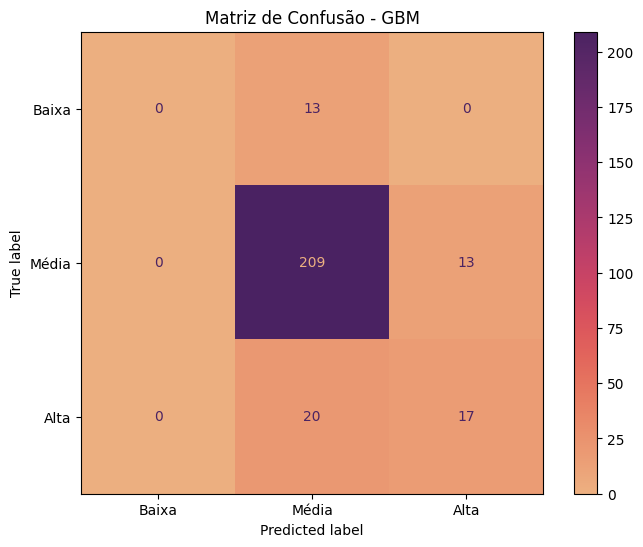

 ================================ MLP ================================


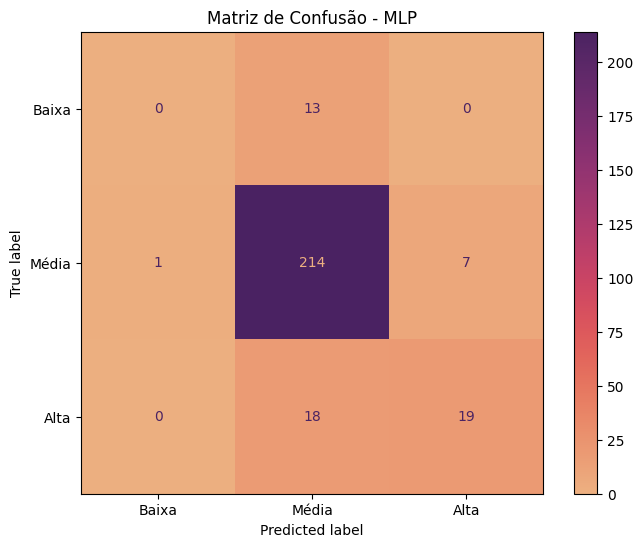

In [109]:
df_results = evaluate_model( best_models_f1['KNN'][0], 'KNN',  X_train, X_test, y_train, y_test, df_results)
df_results = evaluate_model( best_models_f1['SVM'][0], 'SVM',  X_train, X_test, y_train, y_test, df_results)
df_results = evaluate_model( best_models_f1['RF'][0], 'RF',  X_train, X_test, y_train, y_test, df_results)
df_results = evaluate_model( best_models_f1['GBM'][0], 'GBM',  X_train, X_test, y_train, y_test, df_results)
df_results = evaluate_model( best_models_f1['MLP'][0], 'MLP',  X_train, X_test, y_train, y_test, df_results)

In [110]:
df_results

,Modelo,Acurácia,F1-Score,Precisão,Recall
0,KNN,0.834559,0.824512,0.818328,0.834559
1,SVM,0.841912,0.810831,0.794200,0.841912
2,RF,0.852941,0.822534,0.803927,0.852941
3,GBM,0.830882,0.804292,0.781963,0.830882
4,MLP,0.856618,0.830066,0.812311,0.856618
